<H1> NBA Player Data - Clustering </H1>
<h3> By: Ryan Moore </h3>

The goal of this analysis is to group NBA players together based on their performance statisitcs. The groups are made using K-Means Clustering regardless of position. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
#Load the dataset into a data frame. 
df = pd.read_csv('/Users/Ryan/Code/Data645/players_stats_by_season_full_details.csv')

<h2> Exploratory Analysis </h2>

In [3]:
#Get key information about the dataset using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36950 entries, 0 to 36949
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       36950 non-null  object 
 1   Season       36950 non-null  object 
 2   Stage        36950 non-null  object 
 3   Player       36950 non-null  object 
 4   Team         36950 non-null  object 
 5   GP           36950 non-null  int64  
 6   MIN          36950 non-null  float64
 7   FGM          36950 non-null  int64  
 8   FGA          36950 non-null  int64  
 9   3PM          36950 non-null  int64  
 10  3PA          36950 non-null  int64  
 11  FTM          36950 non-null  int64  
 12  FTA          36950 non-null  int64  
 13  TOV          36950 non-null  int64  
 14  PF           36950 non-null  int64  
 15  ORB          36950 non-null  int64  
 16  DRB          36950 non-null  int64  
 17  REB          36950 non-null  int64  
 18  AST          36950 non-null  int64  
 19  STL 

This tells us that there is a total of 36,950 different combinations of players and seasons. The dataset contains players that played in multiple seasons and each combination would be a new row.  

The features include player information, performance statistics, team and season information.  

The majority of the performance statistics are integers or floats. While the other information is an object. 

In [4]:
#Data exploration to understand the different variables using df.describe
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
count,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36774.000000,36912.000000,33919.000000,33919.000000
mean,31.401083,781.178506,117.838268,254.699648,30.616969,87.107876,57.238484,77.404980,49.160162,72.323978,35.362544,94.218106,129.580650,65.333424,27.635372,10.383735,323.544060,1987.492549,197.165827,209.275332,94.955836
std,16.112989,470.295971,91.730585,191.015086,30.658528,80.451297,53.446822,68.662186,34.383808,40.288340,35.028300,78.806687,109.112397,67.823130,20.710504,16.272083,248.591981,4.913384,8.630686,25.669331,11.643626
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,160.000000,130.000000,59.000000
25%,22.000000,476.000000,57.000000,131.000000,7.000000,25.000000,23.000000,32.000000,26.000000,44.000000,13.000000,44.000000,59.000000,24.000000,13.000000,1.000000,160.000000,1984.000000,191.000000,190.000000,86.000000
50%,31.000000,726.000000,99.000000,217.000000,23.000000,71.000000,44.000000,61.000000,43.000000,69.000000,25.000000,75.000000,102.000000,45.000000,23.000000,5.000000,275.000000,1988.000000,198.000000,207.000000,94.000000
75%,38.000000,983.200000,151.000000,323.000000,45.000000,126.000000,75.000000,102.000000,65.000000,93.000000,47.000000,120.000000,166.000000,84.000000,37.000000,13.000000,417.000000,1991.000000,203.000000,225.000000,102.000000
max,83.000000,3239.300000,857.000000,1941.000000,402.000000,1028.000000,756.000000,916.000000,464.000000,332.000000,440.000000,848.000000,1247.000000,907.000000,191.000000,269.000000,2818.000000,2002.000000,229.000000,375.000000,170.000000


The key takeaways are:

Players in this dataset played as little as .7 minutes in a season and as much as 3,239.30 minutes which means there is a large range between the amount of playing time each player got.  

The dataset contains values that are 0 for a lot of the variables as the minimum. This does not require a data cleaning technique as players can not record certain stats especially when they do not play a lot of minutes. 

There are some variables that are very similar such as ORB, DBR, and REB are all rebounding based metrics. 

<h3> Preprocessing </h3>

In [5]:
#Drop the Euroleague by only selecting players that played in the NBA. 
df_nba1 = df[(df['League'] == 'NBA').reset_index(drop=True)]

#Drop attempt stats to leave only makes and drop ORB and DRB to leave only REB
df_nba2 = df_nba1.drop(['FGA', '3PA', 'FTA', 'ORB', 'DRB'], axis=1)

#Drop player information stats and none performance stats
df_nba = df_nba2.drop(['GP', 'birth_year', 'height_cm', 'weight', 'weight_kg'], axis =1)

df_nba.describe()

,MIN,FGM,3PM,FTM,TOV,PF,REB,AST,STL,BLK,PTS
count,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.00000
mean,1252.156540,203.289557,44.155591,95.131065,70.975211,102.045622,223.659283,117.585970,39.715981,25.268987,545.86577
std,919.554382,179.047188,54.483722,105.782806,65.465216,73.885553,208.162226,137.441745,35.680967,32.347052,488.06519
min,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,262.000000,39.000000,2.000000,17.000000,13.000000,24.000000,44.000000,19.000000,8.000000,4.000000,105.00000
50%,1287.700000,172.000000,18.000000,60.000000,58.000000,107.000000,176.000000,71.000000,33.000000,14.000000,454.00000
75%,2060.275000,316.250000,74.250000,135.000000,108.000000,161.250000,328.250000,161.000000,61.000000,33.000000,843.00000
max,3239.300000,857.000000,402.000000,756.000000,464.000000,332.000000,1247.000000,907.000000,191.000000,269.000000,2818.00000


<h3> Visualizations </h3>

Text(0.5, 1.0, 'Histogram: Field Goals Made')

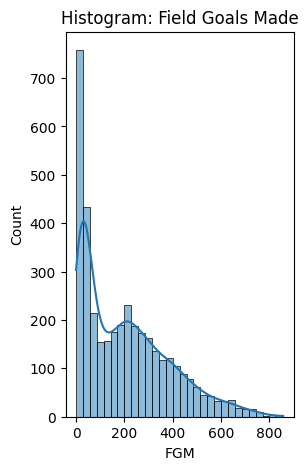

In [6]:
#Plot Histogram of Games Played
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df_nba['FGM'], kde=True, bins=30)
plt.title('Histogram: Field Goals Made')

Text(0.5, 1.0, 'Histogram: 3 Pointers Made')

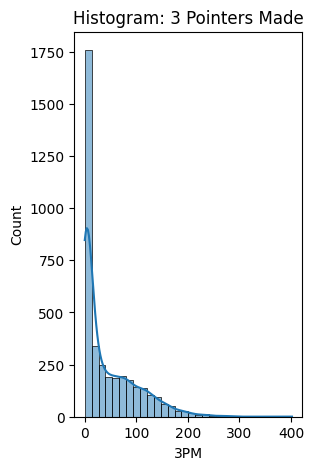

In [7]:
#Plot Histogram of 3 Pointers Made
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df_nba['3PM'], kde=True, bins=30)
plt.title('Histogram: 3 Pointers Made')

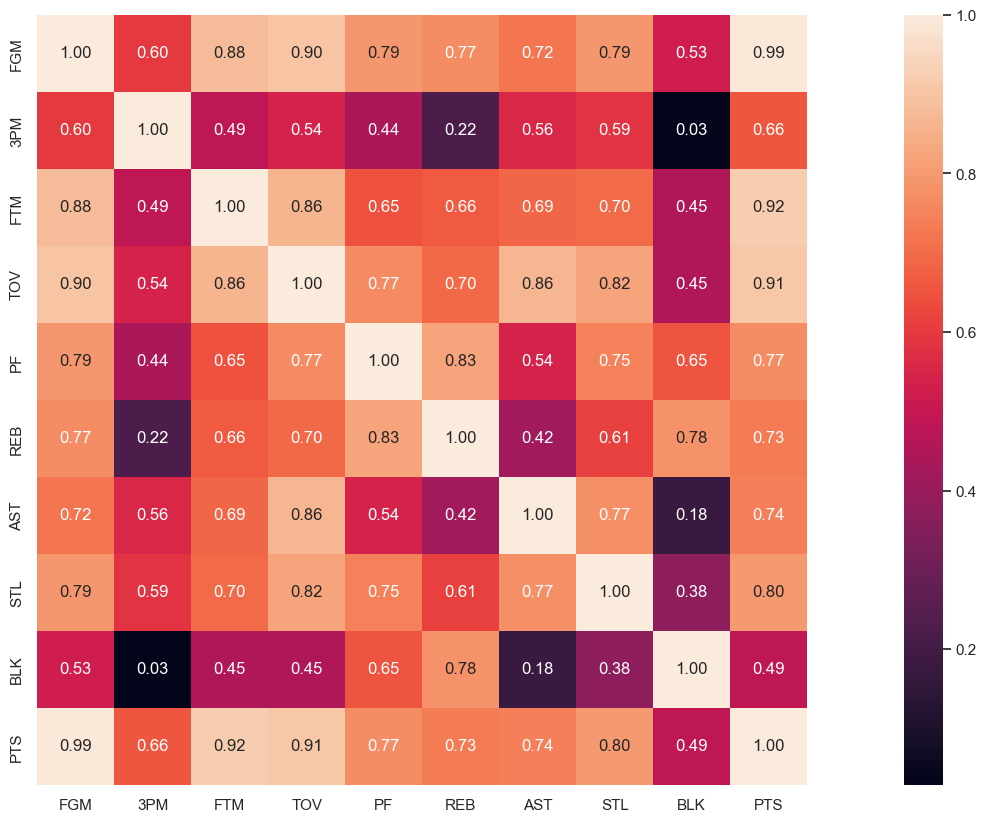

In [8]:
#Make dataframe that only contains numeric data types
df_numeric = df_nba.select_dtypes(include=np.number)
correlation_matrix = df_numeric.columns.values[1:]

#correlation matrix visualization
plt.figure(figsize=(25,10))
cm = np.corrcoef(df_nba[correlation_matrix].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=correlation_matrix, xticklabels=correlation_matrix)
plt.show()


The key takeaways:

There is a large range in the amount of field goals made and 3 pointers made.  This is likely due to players having different degrees in the amount of shot attempts and playing time they receive.  

The correlation matrix shows us that the feature points are highly correlated with field goals made (FGM), 3 point attempts (3PM), and free throws made (FTM).  The features rebounding (REB) and blocks (BLK) are highly correlated which is expected as taller players typically record both of these statisitics. 

<H3> Cluster Development </h3>

In [9]:
#Use the correlation matrix to help with clustering
X = df_numeric[correlation_matrix]

In [10]:
#Scale the data using standard scaler so that the features have a mean of 0 and a std of 1.
Scaling = preprocessing.StandardScaler()
X_std = Scaling.fit_transform(X)

In [11]:
#Cluster using KMeans and 5 clusters
kmeans = KMeans(n_clusters = 5, random_state=42, n_init=1000)
kmeans.fit(X_std)

KMeans(n_clusters=5, n_init=1000, random_state=42)

In [12]:
#Create Cluster Column 
df_numeric['cluster'] = kmeans.predict(X_std)
df_numeric.head()

,MIN,FGM,3PM,FTM,TOV,PF,REB,AST,STL,BLK,PTS,cluster
0,3239.3,794,128,756,271,171,623,231,112,84,2472,3
1,2965.6,768,129,593,261,119,554,651,125,77,2258,3
2,2792.4,719,73,534,252,181,373,501,142,82,2045,3
3,3038.8,720,51,536,149,208,620,218,70,79,2027,3
4,2835.4,716,99,439,233,187,391,365,113,20,1970,3


<h3> Results </h3>

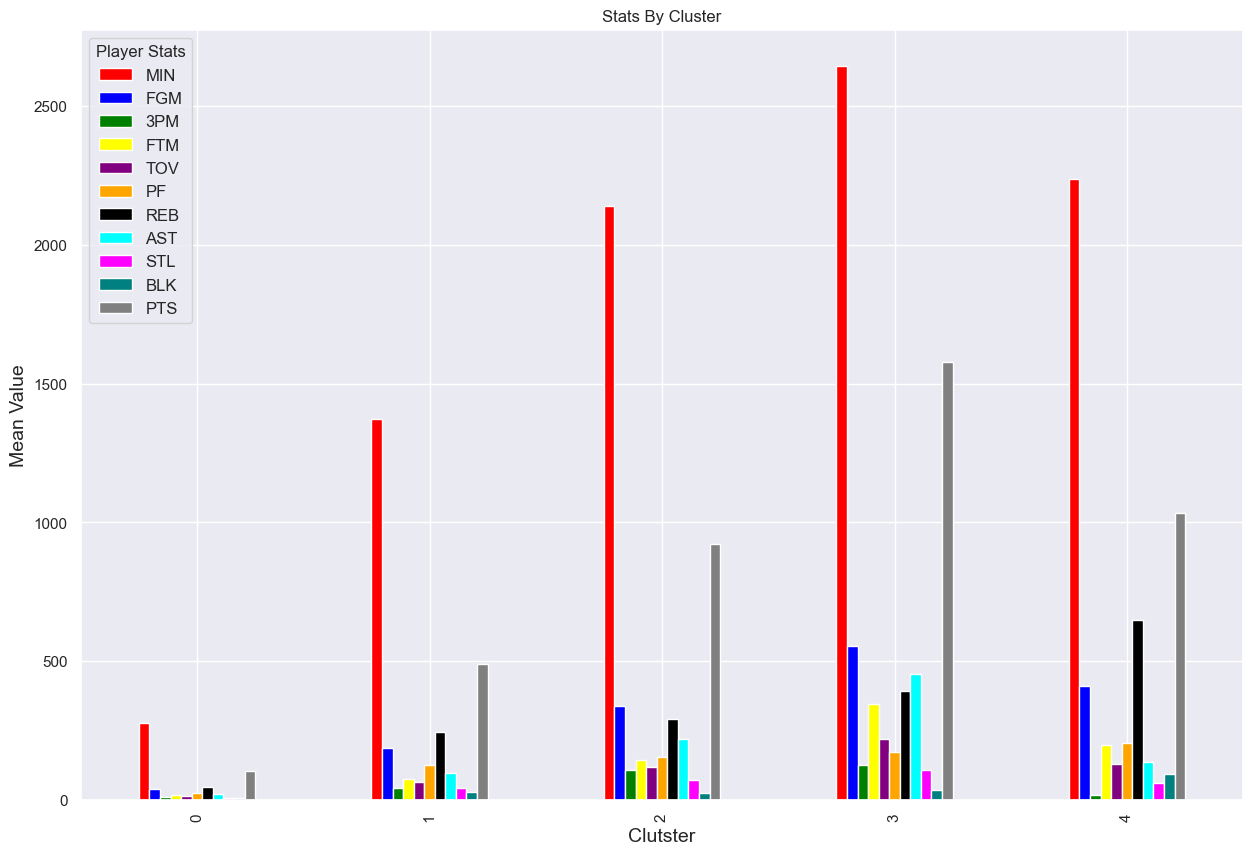

In [13]:
colors = ['red','blue','green','yellow', 'purple','orange','black', 'cyan', 'magenta','teal', 'gray']

data_plot = df_numeric
data_plot.groupby("cluster").aggregate("mean").plot.bar(figsize=(15,10), color = colors)
plt.title("Stats By Cluster")
plt.xlabel('Clutster', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.legend(title='Player Stats', loc='upper left', fontsize=12)

This plot shows us the mean value of the different stats in each of the clusters that were created.  

The players in clusters 0 and 1 are relatively lower minutes and as a result have lower stats.  

The players in cluster 2 and 4 are likely very important players to their team and record a lot of minutes.  

The players in cluster 3 are superstar players and are likely the best players on their team.  

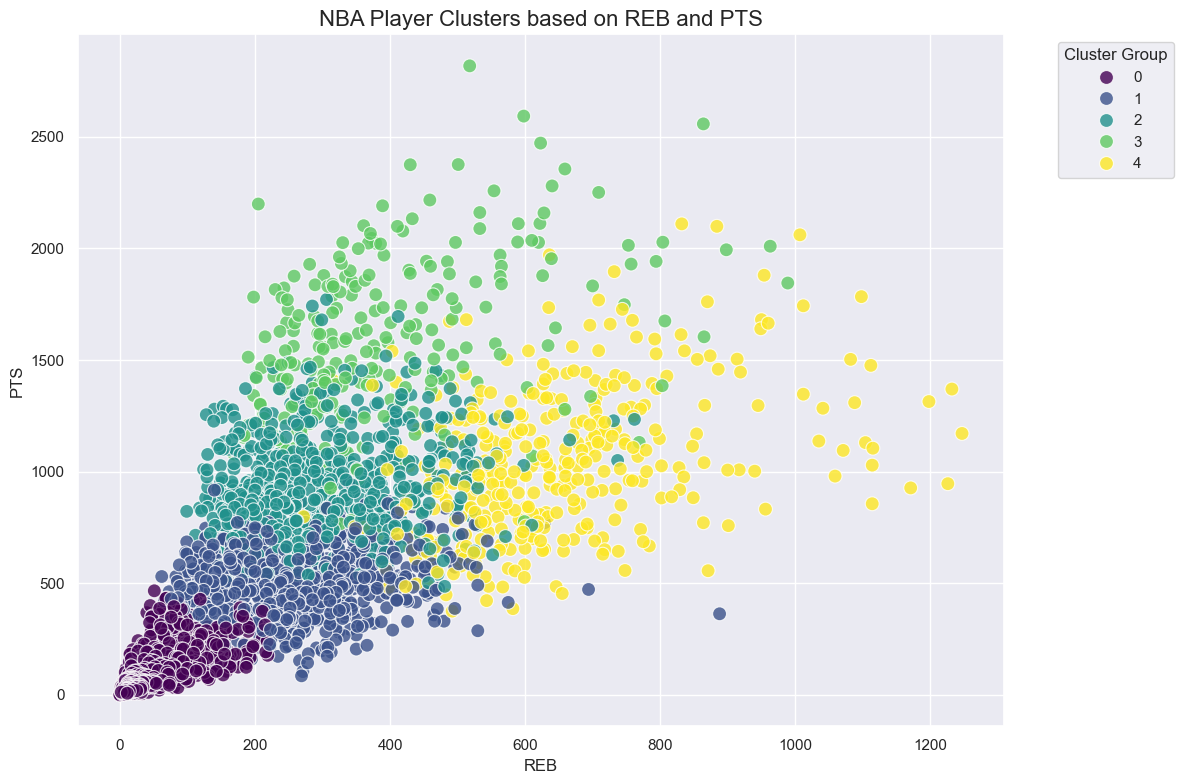

In [14]:
x_feature = 'REB' # Feature for the X-axis
y_feature = 'PTS' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This scatterplot shows the where players in each cluster are based on their rebounds and points in a single season.  

This plot could help a team find players that are overperforming or underperforming. 

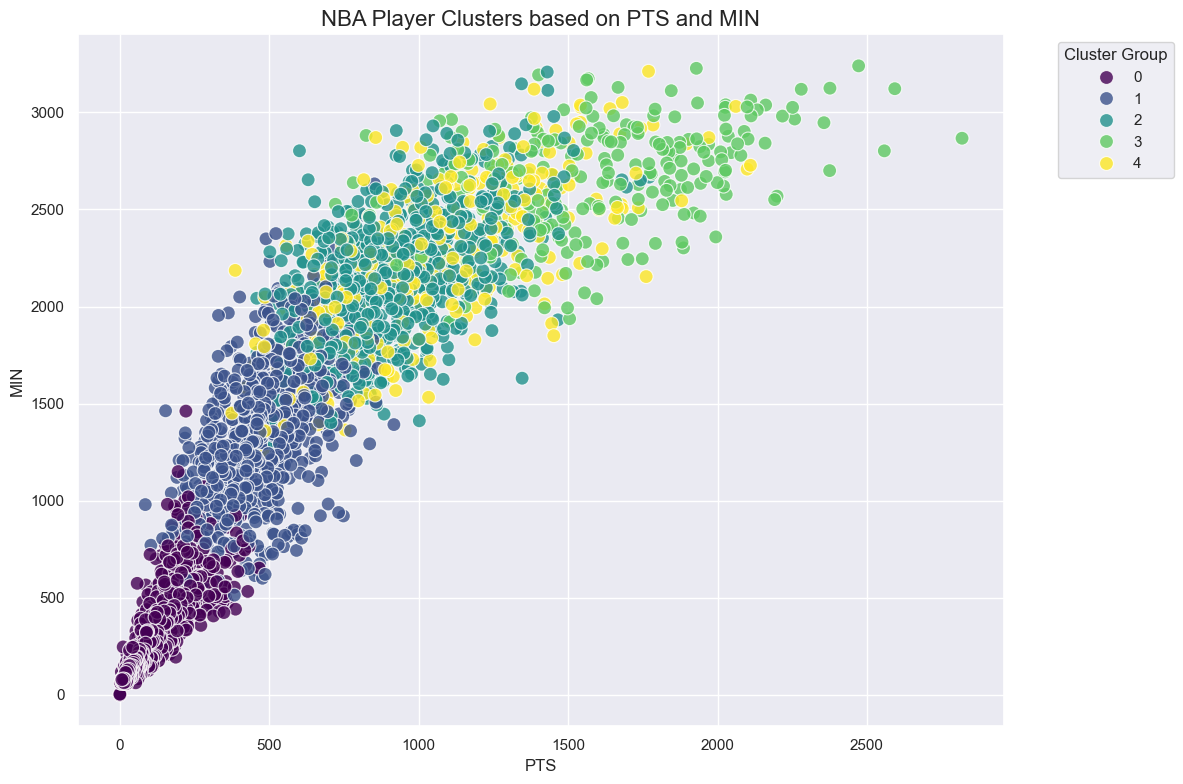

In [15]:
x_feature = 'PTS' # Feature for the X-axis
y_feature = 'MIN' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This scatterplot shows players scoring ability based on the amount of minutes they play.  Teams can use this chart to find players that should be receiving more or less minutes based on their ability to score.

If a team needs more scoring they can find a player that has a relatively low amount of minutes when compared to their points scored.  

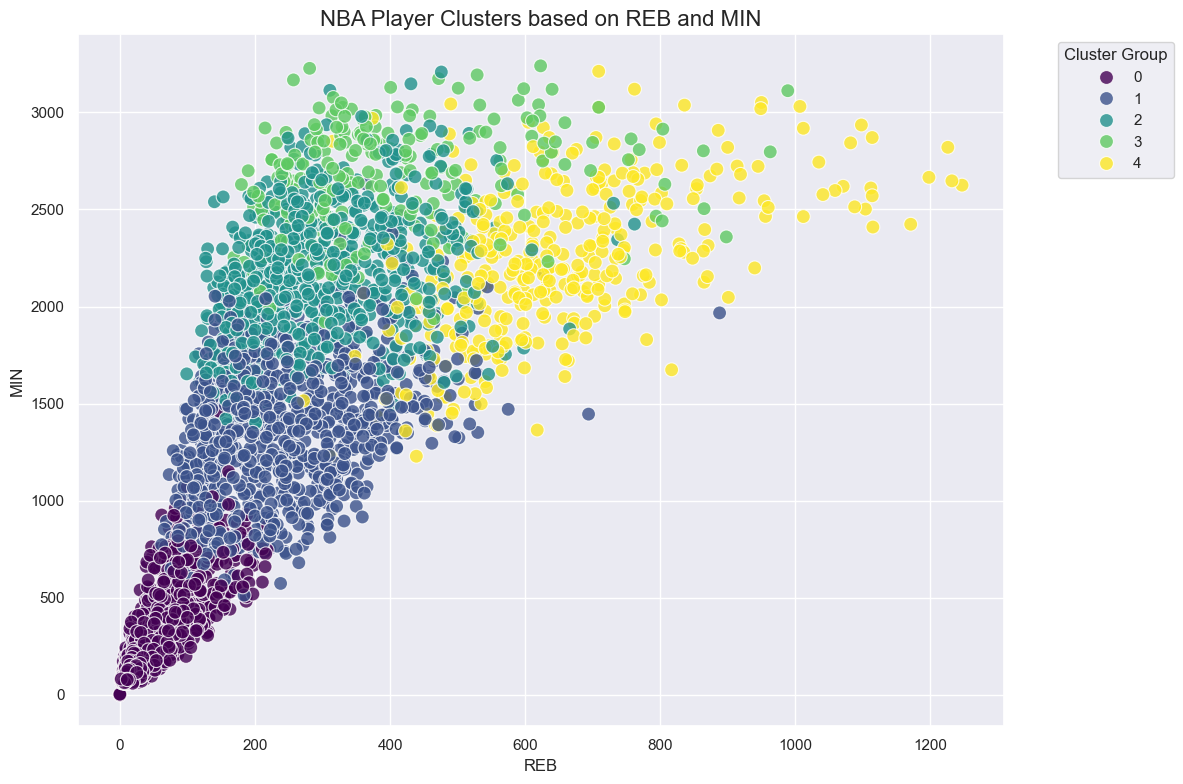

In [16]:
x_feature = 'REB' # Feature for the X-axis
y_feature = 'MIN' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This scatterplot shows players rebounding ability based on the amount of minutes they play.  Teams can use this chart to find players that should be receiving more or less minutes based on their ability to rebound.

If a team needs more rebounding they can find a player that has a relatively low amount of minutes when compared to their total rebounds. 

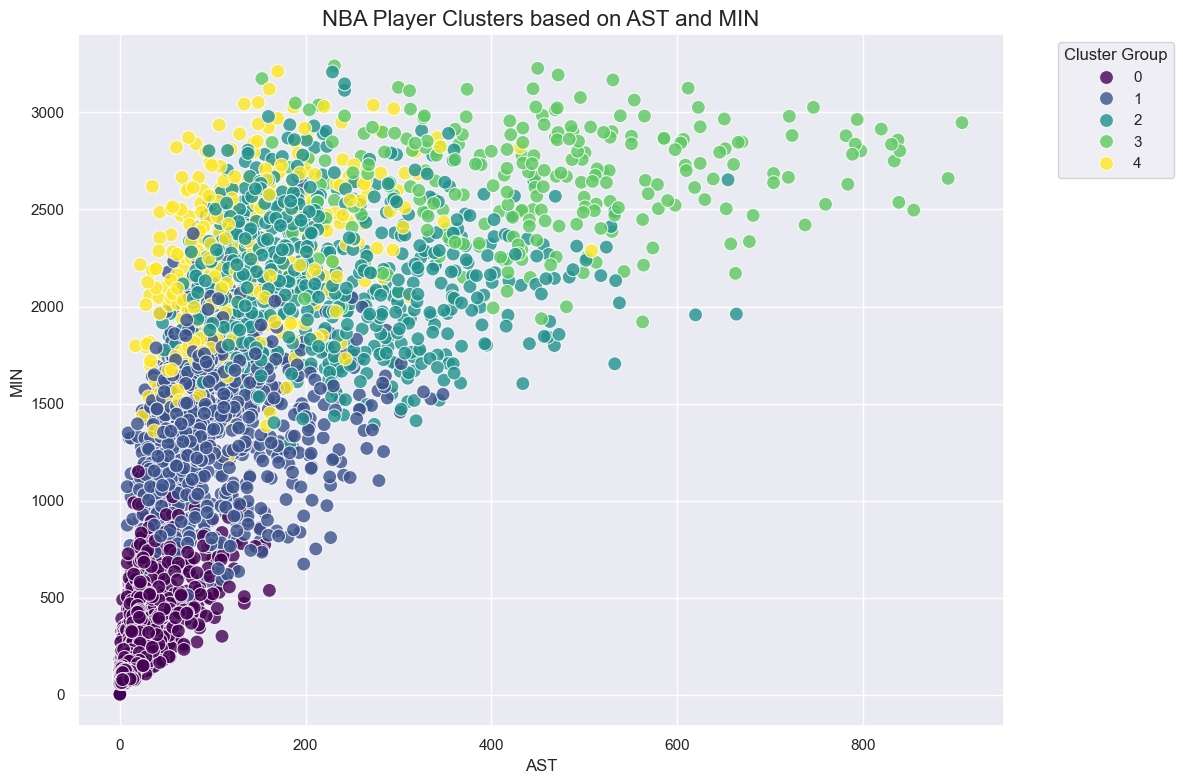

In [17]:
x_feature = 'AST' # Feature for the X-axis
y_feature = 'MIN' # Feature for the Y-axis


plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=data_plot, x=x_feature, y=y_feature, hue='cluster', palette='viridis', s=100, alpha=0.8)

# Set plot title and axis labels
plt.title(f'NBA Player Clusters based on {x_feature} and {y_feature}', fontsize=16)
plt.xlabel(f'{x_feature}', fontsize=12)
plt.ylabel(f'{y_feature}', fontsize=12)
plt.legend(title='Cluster Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This scatterplot shows players ability to record an assist based on the amount of minutes they play.  Teams can use this chart to find players that should be receiving more or less minutes based on their ability to get assists.

If a team needs more assists they can find a player that has a relatively low amount of minutes when compared to their amount of assists. 

<H3> Conclusion </H3>

The evolution of basketball has made it so that players no longer play traditional roles in basketball such as point guard, shooting guard, small forward, power forward, and center.  

By using K-Means Clustering, teams can group players based on their overall performance.  These clusters can then be used to help determine how much money a player should receive as well as how much playing time a player should be getting.

The players in cluster 0 should likely be cut from the team if they are not young players that the teams are developing. 

The players in cluster 1 should be reviewed in a case by case basis based on potential and overall contract.

The players in clusters 2 and 4 should be resigned with relatively large contracts based on the teams needs.

The players in cluster 3 are the best players and should receive contracts that reflect that. 